## Import Library

In [13]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import pyodbc

## Load data

In [14]:
def connection_sql_server(cnxn_str):
    try:
        cnxn = pyodbc.connect(cnxn_str)
        print ("Success connection")
        cursor = cnxn.cursor()
        return cnxn, cursor
    except Exception as e:
        print("Error connection: " + str(e))

def run_query(cnxn, query):
    ''' This function runs the query on the database table and
    prints the output on the terminal. Function returns nothing. '''
    try:
        df = pd.read_sql(query, cnxn)
        return df
    except Exception as e:
        print("Error while selecting data table" + str(e))

In [15]:
server = "localhost\SQLEXPRESS"
database = "GlobalElectronicsRetailerDB"
cnxn_str = ("Driver={ODBC Driver 17 for SQL Server};"
                      "Server="+ server +";"
                      "Database="+ database +";"
                      "Trusted_Connection=yes;")

In [16]:
cnxn, cursor = connection_sql_server(cnxn_str)

Success connection


In [19]:
query = """SELECT * FROM report_customers"""

df_customer = run_query(cnxn, query)
print(df_customer.head())

C:\Users\Acer\AppData\Local\Temp\ipykernel_31728\540215839.py:14: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql(query, cnxn)


  CustomerKey         Country                State  Gender  Age  \
0     1000050  United Kingdom       South Lakeland  Female   42   
1     1000168  United Kingdom           New Forest    Male   51   
2     1000242  United Kingdom  Newark and Sherwood  Female   21   
3      100040       Australia             Victoria  Female   80   
4     1000489  United Kingdom                 York  Female   37   

  Customer_Segment First_Order_Date Last_Order_Date  Recency  Lifespan  \
0          Regular       2017-02-11      2020-02-22      364        36   
1              VIP       2018-07-21      2019-11-02      476        16   
2          Regular       2016-10-17      2018-08-31      904        22   
3              New       2018-08-30      2018-08-30      905         0   
4          Regular       2017-06-02      2018-12-24      789        18   

   Total_Orders   Total_Sales  Total_Quantity  Total_Products  \
0             2   1292.970009               5               4   
1             3  10160

## Data Scaling

In [20]:
from sklearn.preprocessing import StandardScaler

features = ['Total_Sales', 'Total_Orders', 'Total_Quantity', 'Total_Products', 'Age', 'Recency', 'Avg_Order_Value', 'Avg_Monthly_Spend']
scaler = StandardScaler()
X_scaled = scaler.fit_transform(df_customer[features])

## KMeans clustering

In [21]:
from sklearn.cluster import KMeans

# Thử trước với 4 nhóm
kmeans = KMeans(n_clusters=4, random_state=42)
df_customer['Cluster'] = kmeans.fit_predict(X_scaled)

c:\Users\Acer\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [22]:
print(df_customer.groupby('Cluster')[features].mean())

          Total_Sales  Total_Orders  Total_Quantity  Total_Products  \
Cluster                                                               
0        13913.740555      4.766616       44.126888       13.243958   
1         1443.619511      1.335368        7.190094        2.527904   
2         9569.968762      1.239382       16.772201        4.418275   
3         5335.663136      2.812192       20.995311        6.718657   

               Age     Recency  Avg_Order_Value  Avg_Monthly_Spend  
Cluster                                                             
0        52.536254  354.080816      3217.960218         549.639091  
1        52.792292  768.468085      1143.885037         972.734920  
2        51.803089  882.866152      7734.946596        7331.349850  
3        52.756170  429.200642      2073.045828         465.480204  


## Visualization

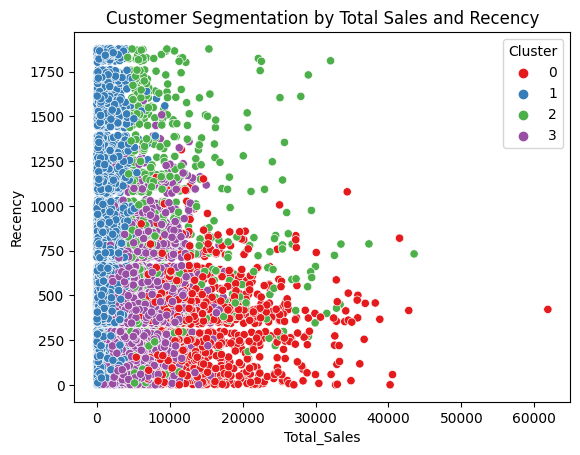

In [23]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.scatterplot(data=df_customer, x='Total_Sales', y='Recency', hue='Cluster', palette='Set1')
plt.title('Customer Segmentation by Total Sales and Recency')
plt.show()

## Choose number of cluster (K)

### Elbow Method

c:\Users\Acer\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\Acer\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\Acer\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\Acer\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `

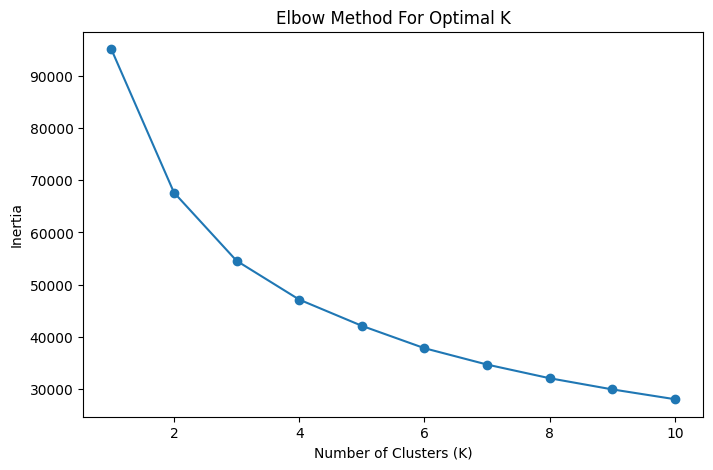

In [25]:
# Use Elbow Method
inertia = []
K_range = range(1, 11)
for k in K_range:
    km = KMeans(n_clusters=k, random_state=42).fit(X_scaled)
    inertia.append(km.inertia_)

plt.figure(figsize=(8,5))
plt.plot(K_range, inertia, marker='o')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('Inertia')
plt.title('Elbow Method For Optimal K')
plt.show()

### Silhouette Score

c:\Users\Acer\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\Acer\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\Acer\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\Acer\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `

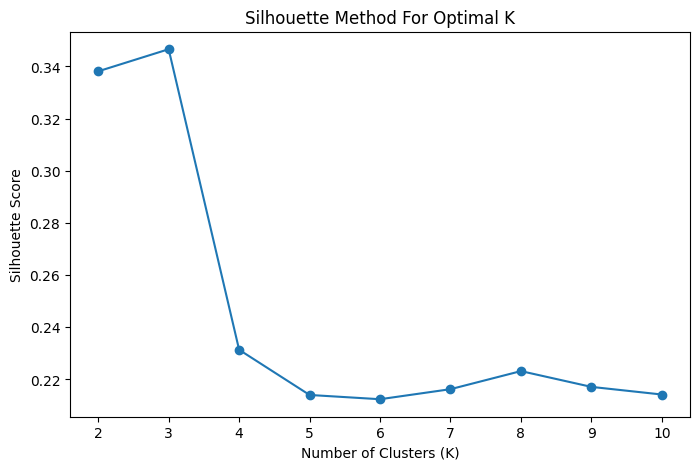

In [26]:
from sklearn.metrics import silhouette_score

silhouette_scores = []
K_range = range(2, 11)
for k in K_range:
    km = KMeans(n_clusters=k, random_state=42).fit(X_scaled)
    score = silhouette_score(X_scaled, km.labels_)
    silhouette_scores.append(score)

plt.figure(figsize=(8,5))
plt.plot(K_range, silhouette_scores, marker='o')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Method For Optimal K')
plt.show()

Choose K=3 with the highest silhouette score.

## Choose K=3 for KMeans model

In [27]:
kmeans = KMeans(n_clusters=3, random_state=42)
df_customer['Cluster'] = kmeans.fit_predict(X_scaled)

c:\Users\Acer\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [28]:
print(df_customer.groupby('Cluster')[features].mean())

         Total_Sales  Total_Orders  Total_Quantity  Total_Products        Age  \
Cluster                                                                         
0        9857.812080      3.895089       33.830995       10.369579  52.453125   
1        2140.032977      1.651075        9.819343        3.345133  52.888369   
2        9409.892981      1.249703       16.637337        4.409037  51.662307   

            Recency  Avg_Order_Value  Avg_Monthly_Spend  
Cluster                                                  
0        383.195153      2730.969408         469.450814  
1        677.161441      1306.991055         818.432202  
2        882.592152      7523.224762        7065.365445  


- **Cluster 0**:
  - High sales (9,857)
  - Highest number of orders (3.9 orders)
  - High total purchase volume (33.8 items)
  - Mid-range average order value (~2,730)
  - Recency ~383 → More recent PURCHASES than the other 2 groups
    
    → Loyal customers, buy a lot, buy regularly, still active. Label: "**Loyal Customers**"
- **Cluster 1**:
  - Lowest Sales (2,140)
  - Low Orders (1.65 orders)
  - Low Average Order Value (1,307)
  - Recency 677 (Not Purchased for a Long Time)
  
    → Customers Who Purchased Less, Haven't Purchased Recently, Low Spending. Label: "**At-Risk / Low-Value Customers**"

- **Cluster 2**:
  - High sales (9,409)
  - Lowest orders (1.25 orders)
  - But the average value of 1 order is extremely high (~7,523)
  - Total average products are less than cluster 0 (4.4 products)
  - Highest Recency (882 days → long time no purchase)
    
    → Buy less but BUY AT VERY BIG VALUE, haven't been back for a long time. Label: "**High-Value Inactive Customers**"

In [ ]:
# Loyal Customers: Buy regularly, close → need to maintain, upsell.
#High-Value Inactive Customers : Buy less, long time, but BUY BIG → need comeback strategy (winback)
 # At-Risk / Low-Value Customers: Buy less, low value → need to stimulate again

cluster_labels = {
    0: 'Loyal Customers',
    1: 'At-Risk / Low-Value Customers',
    2: 'High-Value Inactive Customers'
}

df_customer['Customer_Segment'] = df_customer['Cluster'].map(cluster_labels)

In [30]:
df_customer.head()

,CustomerKey,Country,State,Gender,Age,Customer_Segment,First_Order_Date,Last_Order_Date,Recency,Lifespan,Total_Orders,Total_Sales,Total_Quantity,Total_Products,Avg_Order_Value,Avg_Monthly_Spend,Cluster
0,1000050,United Kingdom,South Lakeland,Female,42,At-Risk / Low-Value Customers,2017-02-11,2020-02-22,364,36,2,1292.970009,5,4,646.485004,35.915834,1
1,1000168,United Kingdom,New Forest,Male,51,Loyal Customers,2018-07-21,2019-11-02,476,16,3,10160.859987,41,10,3386.953329,635.053749,0
2,1000242,United Kingdom,Newark and Sherwood,Female,21,At-Risk / Low-Value Customers,2016-10-17,2018-08-31,904,22,2,8010.959999,19,4,4005.480000,364.134545,1
3,100040,Australia,Victoria,Female,80,At-Risk / Low-Value Customers,2018-08-30,2018-08-30,905,0,1,4158.000000,9,3,4158.000000,4158.000000,1
4,1000489,United Kingdom,York,Female,37,At-Risk / Low-Value Customers,2017-06-02,2018-12-24,789,18,2,3739.610005,23,10,1869.805002,207.756111,1


In [32]:
df_customer.to_csv("../data/report/Customer_report_data.csv", index=False)